# Name: Paavani Ramakrishna
# Git Username: paavani2000
# USC id: 7696462483

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

a. Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv("../Data/Frogs_MFCCs.csv")
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [4]:
df.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


(b)Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

i.Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem


In [5]:
label_family = df[['Family']]
label_species = df[['Species']]
label_genus = df[['Genus']]

In [6]:
x_data = df.drop(['Family','Genus','Species','RecordID'],axis=1)
x_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,hamming_loss, classification_report
from sklearn.model_selection import GridSearchCV

In [8]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(x_data, label_family, test_size=0.3, random_state=42)

In [9]:
label_columns = ['Family', 'Genus', 'Species']

# Initialize storage for metrics
metrics = {
    'Family': {'Standardized': {}, 'Raw': {}},
    'Genus': {'Standardized': {}, 'Raw': {}},
    'Species': {'Standardized': {}, 'Raw': {}}
}

for label in label_columns:
    # Create feature and label sets
    y = df[label]
    
    # Split data with stratified sampling
    X_tr, X_te, y_tr, y_te = train_test_split(
        x_data, y, test_size=0.3, stratify=y, random_state=45
    )
    
    # Process both feature types
    for scale_type in ['Standardized', 'Raw']:
        # Feature preprocessing
        if scale_type == 'Standardized':
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_tr)
            X_test = scaler.transform(X_te)
        else:
            X_train = X_tr.values
            X_test = X_te.values
            
        # Model configuration
        param_grid = {
            'C': [1, 10, 100, 1000],
            'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.5],
            'kernel': ['rbf']
        }
        
        # Model training
        model = GridSearchCV(
            estimator=SVC(decision_function_shape='ovr'),
            param_grid=param_grid,
            cv=10,
            n_jobs=-1
        )
        model.fit(X_train, y_tr.values.ravel())
        
        # Model evaluation
        predictions = model.predict(X_test)
        metrics[label][scale_type] = {
            'best_params': model.best_params_,
            'classification_report': classification_report(y_te, predictions),
            'hamming_loss': hamming_loss(y_te, predictions),
            'hamming_score': 1 - hamming_loss(y_te, predictions)
        }

In [10]:
print("\n=== Family Classification Results ===")
for scale_type in ['Raw', 'Standardized']:
    print(f"\n{scale_type} Features:")
    print(f"Optimal Parameters: {metrics['Family'][scale_type]['best_params']}")
    print(metrics['Family'][scale_type]['classification_report'])
    print(f"Hamming Loss: {metrics['Family'][scale_type]['hamming_loss']:.4f}")


=== Family Classification Results ===

Raw Features:
Optimal Parameters: {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.90      0.95        20
  Dendrobatidae       0.99      1.00      0.99       163
        Hylidae       0.99      0.98      0.99       650
Leptodactylidae       0.99      0.99      0.99      1326

       accuracy                           0.99      2159
      macro avg       0.99      0.97      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

Hamming Loss: 0.0088

Standardized Features:
Optimal Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.85      0.92        20
  Dendrobatidae       1.00      0.99      1.00       163
        Hylidae       0.96      0.99      0.98       650
Leptodactylidae       1.00      0.98      0.99      1326

       accuracy                 

In [11]:
print("\n=== Genus Classification Results ===")
for scale_type in ['Raw', 'Standardized']:    
    print(f"\n{scale_type} Features:")
    print(f"Optimal Parameters: {metrics['Genus'][scale_type]['best_params']}")
    print(metrics['Genus'][scale_type]['classification_report'])
    print(f"Hamming Loss: {metrics['Genus'][scale_type]['hamming_loss']:.4f}")


=== Genus Classification Results ===

Raw Features:
Optimal Parameters: {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
               precision    recall  f1-score   support

    Adenomera       0.99      0.99      0.99      1245
     Ameerega       1.00      0.99      0.99       163
Dendropsophus       0.97      0.91      0.94        93
    Hypsiboas       0.99      0.99      0.99       478
Leptodactylus       0.96      0.99      0.98        81
Osteocephalus       0.93      0.82      0.87        34
     Rhinella       0.94      0.85      0.89        20
       Scinax       0.90      0.98      0.94        45

     accuracy                           0.99      2159
    macro avg       0.96      0.94      0.95      2159
 weighted avg       0.99      0.99      0.99      2159

Hamming Loss: 0.0144

Standardized Features:
Optimal Parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      0.99      1245
  

In [12]:
print("\n=== Species Classification Results ===")
for scale_type in ['Raw', 'Standardized']:    
    print(f"\n{scale_type} Features:")
    print(f"Optimal Parameters: {metrics['Species'][scale_type]['best_params']}")
    print(metrics['Species'][scale_type]['classification_report'])
    print(f"Hamming Loss: {metrics['Species'][scale_type]['hamming_loss']:.4f}")


=== Species Classification Results ===

Raw Features:
Optimal Parameters: {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.98      0.98       202
AdenomeraHylaedactylus       1.00      1.00      1.00      1044
    Ameeregatrivittata       0.99      1.00      1.00       163
            HylaMinuta       0.96      0.96      0.96        93
  HypsiboasCinerascens       0.97      0.99      0.98       142
     HypsiboasCordobae       0.99      0.99      0.99       336
   LeptodactylusFuscus       0.98      1.00      0.99        81
 OsteocephalusOophagus       0.89      0.94      0.91        34
     Rhinellagranulosa       0.94      0.80      0.86        20
           ScinaxRuber       1.00      0.98      0.99        44

              accuracy                           0.99      2159
             macro avg       0.97      0.96      0.97      2159
          weighted avg       0.99      0.99      

In [13]:
total_score = 0
count = 0

for label in metrics:
    for scale_type in metrics[label]:
        total_score += metrics[label][scale_type]['hamming_score']
        count += 1
        
average_gaussian_hamming_score = total_score / count

print("Average Gaussian Hamming Score:", average_gaussian_hamming_score)

Average Gaussian Hamming Score: 0.9878029952138337


ii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the at-tributes. Determine the weight of the SVM penalty using 10 fold cross validation

In [14]:
label_columns = ['Family', 'Genus', 'Species']
param_grid = [{'C': [1, 10, 100, 1000], 'max_iter': [20000]}]

metrics = {
    'Family': {'Standardized': {}, 'Raw': {}},
    'Genus': {'Standardized': {}, 'Raw': {}},
    'Species': {'Standardized': {}, 'Raw': {}}
}

for label in label_columns:
    # Create feature and label sets
    y = df[label]
    
    # Split data with stratified sampling
    X_tr, X_te, y_tr, y_te = train_test_split(
        x_data, y, test_size=0.3, stratify=y, random_state=45
    )
    
    # Process both feature types
    for scale_type in ['Standardized', 'Raw']:
        # Feature preprocessing
        if scale_type == 'Standardized':
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_tr)
            X_test = scaler.transform(X_te)
        else:
            X_train = X_tr.values
            X_test = X_te.values
            
        # L1-penalized SVM configuration
        model = GridSearchCV(
            estimator=LinearSVC(
                penalty='l1', 
                loss='squared_hinge', 
                dual=False,
            ),
            param_grid=param_grid,
            cv=10,
            n_jobs=-1
        )
        
        # Model training
        model.fit(X_train, y_tr.values.ravel())
        
        # Model evaluation
        predictions = model.predict(X_test)
        metrics[label][scale_type] = {
            'best_C': model.best_params_['C'],
            'accuracy': accuracy_score(y_te, predictions),
            'classification_report': classification_report(y_te, predictions),
            'hamming_loss': hamming_loss(y_te, predictions),
            'hamming_score': 1 - hamming_loss(y_te, predictions),
            'coef_shape': model.best_estimator_.coef_.shape  # Shows feature selection
        }

In [15]:
print("\n=== Family Classification Results using L1 regularization===")
for scale_type in ['Raw', 'Standardized']:    
    print(f"\n{scale_type} Features:")
    print(f"Optimal Parameters: {metrics['Family'][scale_type]['best_C']}")
    print(metrics['Family'][scale_type]['classification_report'])
    print(f"Hamming Loss: {metrics['Family'][scale_type]['hamming_loss']:.4f}")


=== Family Classification Results using L1 regularization===

Raw Features:
Optimal Parameters: 1000
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        20
  Dendrobatidae       0.87      0.84      0.86       163
        Hylidae       0.90      0.90      0.90       650
Leptodactylidae       0.95      0.97      0.96      1326

       accuracy                           0.93      2159
      macro avg       0.68      0.68      0.68      2159
   weighted avg       0.92      0.93      0.93      2159

Hamming Loss: 0.0681

Standardized Features:
Optimal Parameters: 100
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        20
  Dendrobatidae       0.88      0.85      0.86       163
        Hylidae       0.90      0.90      0.90       650
Leptodactylidae       0.95      0.97      0.96      1326

       accuracy                           0.93      2159
      macro avg       0.68

In [16]:
print("\n=== Genus Classification Results using L1 regularization===")
for scale_type in ['Raw', 'Standardized']:    
    print(f"\n{scale_type} Features:")
    print(f"Optimal Parameters: {metrics['Genus'][scale_type]['best_C']}")
    print(metrics['Genus'][scale_type]['classification_report'])
    print(f"Hamming Loss: {metrics['Genus'][scale_type]['hamming_loss']:.4f}")


=== Genus Classification Results using L1 regularization===

Raw Features:
Optimal Parameters: 100
               precision    recall  f1-score   support

    Adenomera       0.97      0.99      0.98      1245
     Ameerega       0.91      0.94      0.92       163
Dendropsophus       0.92      0.60      0.73        93
    Hypsiboas       0.93      0.99      0.96       478
Leptodactylus       1.00      0.93      0.96        81
Osteocephalus       0.94      0.44      0.60        34
     Rhinella       0.94      0.75      0.83        20
       Scinax       0.95      0.91      0.93        45

     accuracy                           0.95      2159
    macro avg       0.94      0.82      0.86      2159
 weighted avg       0.95      0.95      0.95      2159

Hamming Loss: 0.0459

Standardized Features:
Optimal Parameters: 100
               precision    recall  f1-score   support

    Adenomera       0.97      0.99      0.98      1245
     Ameerega       0.91      0.95      0.93       163
De

In [17]:
print("\n=== Species Classification Results using L1 regularization===")
for scale_type in ['Raw', 'Standardized']:    
    print(f"\n{scale_type} Features:")
    print(f"Optimal Parameters: {metrics['Species'][scale_type]['best_C']}")
    print(metrics['Species'][scale_type]['classification_report'])
    print(f"Hamming Loss: {metrics['Species'][scale_type]['hamming_loss']:.4f}")


=== Species Classification Results using L1 regularization===

Raw Features:
Optimal Parameters: 1000
                        precision    recall  f1-score   support

        AdenomeraAndre       0.92      0.92      0.92       202
AdenomeraHylaedactylus       0.99      1.00      0.99      1044
    Ameeregatrivittata       0.93      0.96      0.95       163
            HylaMinuta       0.90      0.70      0.79        93
  HypsiboasCinerascens       0.91      0.94      0.92       142
     HypsiboasCordobae       0.92      0.97      0.94       336
   LeptodactylusFuscus       0.97      0.89      0.93        81
 OsteocephalusOophagus       0.95      0.62      0.75        34
     Rhinellagranulosa       0.94      0.80      0.86        20
           ScinaxRuber       0.95      0.95      0.95        44

              accuracy                           0.95      2159
             macro avg       0.94      0.88      0.90      2159
          weighted avg       0.95      0.95      0.95      2159

In [18]:
total_score = 0
count = 0

for label in metrics:
    for scale_type in metrics[label]:
        total_score += metrics[label][scale_type]['hamming_score']
        count += 1
        
average_gaussian_hamming_score = total_score / count

print("Average Gaussian Hamming Score using L1 regularization:", average_gaussian_hamming_score)

Average Gaussian Hamming Score using L1 regularization: 0.9471205805156709


iv.Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [19]:
metrics = {
    'Family': {},
    'Genus': {},
    'Species': {}
}

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

for label in label_columns:
    # Create feature and label sets
    y = df[label]
    
    # Split data with stratified sampling
    X_tr, X_te, y_tr, y_te = train_test_split(
        x_data, y, test_size=0.3, stratify=y, random_state=45
    )
    
    # Standardize features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_tr)
    X_test_std = scaler.transform(X_te)
    
    # Apply SMOTE
    smote = SMOTE(random_state=45)
    X_balanced, y_balanced = smote.fit_resample(X_train_std, y_tr.values.ravel())
    
    # Train L1-penalized SVM
    model = GridSearchCV(
        LinearSVC(penalty='l1', dual=False, max_iter=20000),
        param_grid,
        cv=10,
        n_jobs=-1
    )
    model.fit(X_balanced, y_balanced)
    
    # Store results
    predictions = model.predict(X_test_std)
    metrics[label] = {
        'best_C': model.best_params_['C'],
        'classification_report': classification_report(y_te, predictions, digits=4),
        'hamming_loss': hamming_loss(y_te, predictions),
        'hamming_score': 1 - hamming_loss(y_te, predictions)
    }

In [20]:
print("\n=== Species Classification Results using SMOTE")
print(f"Optimal Parameters: C={metrics['Family']['best_C']}")
print(metrics['Family']['classification_report'])
print(f"Hamming Loss: {metrics['Family']['hamming_loss']:.4f}")


=== Species Classification Results using SMOTE
Optimal Parameters: C=100
                 precision    recall  f1-score   support

      Bufonidae     0.2754    0.9500    0.4270        20
  Dendrobatidae     0.7633    0.9693    0.8541       163
        Hylidae     0.9245    0.8662    0.8944       650
Leptodactylidae     0.9647    0.9268    0.9454      1326

       accuracy                         0.9120      2159
      macro avg     0.7319    0.9281    0.7802      2159
   weighted avg     0.9310    0.9120    0.9183      2159

Hamming Loss: 0.0880


In [21]:
print("\n=== Species Classification Results using SMOTE")
print(f"Optimal Parameters: C={metrics['Genus']['best_C']}")
print(metrics['Genus']['classification_report'])
print(f"Hamming Loss: {metrics['Genus']['hamming_loss']:.4f}")


=== Species Classification Results using SMOTE
Optimal Parameters: C=100
               precision    recall  f1-score   support

    Adenomera     0.9870    0.9149    0.9496      1245
     Ameerega     0.8870    0.9632    0.9235       163
Dendropsophus     0.5812    0.7312    0.6476        93
    Hypsiboas     0.9555    0.9435    0.9495       478
Leptodactylus     0.9167    0.9506    0.9333        81
Osteocephalus     0.4828    0.8235    0.6087        34
     Rhinella     0.3556    0.8000    0.4923        20
       Scinax     0.8269    0.9556    0.8866        45

     accuracy                         0.9166      2159
    macro avg     0.7491    0.8853    0.7989      2159
 weighted avg     0.9352    0.9166    0.9230      2159

Hamming Loss: 0.0834


In [22]:
print("\n=== Species Classification Results using SMOTE")
print(f"Optimal Parameters: C={metrics['Species']['best_C']}")
print(metrics['Species']['classification_report'])
print(f"Hamming Loss: {metrics['Species']['hamming_loss']:.4f}")


=== Species Classification Results using SMOTE
Optimal Parameters: C=100
                        precision    recall  f1-score   support

        AdenomeraAndre     0.9632    0.9059    0.9337       202
AdenomeraHylaedactylus     0.9933    0.9933    0.9933      1044
    Ameeregatrivittata     0.9259    0.9202    0.9231       163
            HylaMinuta     0.8316    0.8495    0.8404        93
  HypsiboasCinerascens     0.8816    0.9437    0.9116       142
     HypsiboasCordobae     0.9605    0.9405    0.9504       336
   LeptodactylusFuscus     0.9359    0.9012    0.9182        81
 OsteocephalusOophagus     0.7647    0.7647    0.7647        34
     Rhinellagranulosa     0.5625    0.9000    0.6923        20
           ScinaxRuber     0.9535    0.9318    0.9425        44

              accuracy                         0.9528      2159
             macro avg     0.8773    0.9051    0.8870      2159
          weighted avg     0.9554    0.9528    0.9535      2159

Hamming Loss: 0.0472


In [23]:
total_score = 0
count = 0

for label in metrics:
    total_score += metrics[label]['hamming_score']
    count += 1
        
average_gaussian_hamming_score = total_score / count

print("Average Gaussian Hamming Score using SMOTE:", average_gaussian_hamming_score)

Average Gaussian Hamming Score using SMOTE: 0.9271267562142967


# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
Monte-Carlo Simulation:Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, hamming_loss
import statistics
import random

data = pd.read_csv(r'../Data/Frogs_MFCCs.csv')
data = data.drop('RecordID',axis=1)
cols = [e for e in data if e not in ('Family','Genus','Species')]
X = data.loc[:,cols]  # MFCC features
Y = data.loc[:, ['Family','Genus','Species']]  # Labels


final_ham_loss = []
final_ham_score = []

majority_triplets = []  # Stores results for part (b)

for simulation in range(50):
    print(f"\n=== Simulation {simulation+1}/50 ===")
    
    # Part (a): Determine optimal k using Silhouette
    silh_scores = {}
    for k in range(2, 21):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', 
                       random_state=random.randint(0, 1000))
        labels = kmeans.fit_predict(X)
        silh_scores[k] = silhouette_score(X, labels)
    
    optimal_k = max(silh_scores, key=silh_scores.get)
    print(f"Optimal k: {optimal_k}")
    
    # Perform clustering
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init='auto',
                   random_state=random.randint(0, 1000))
    cluster_labels = kmeans.fit_predict(X)
    
    # Part (b): Store majority labels
    clustered_data = pd.concat([X, Y], axis=1)
    clustered_data['Cluster'] = cluster_labels
    
    current_sim_majority = []
    for cluster_num in range(optimal_k):  # Changed from fixed 4 to optimal_k
        cluster_subset = clustered_data[clustered_data['Cluster'] == cluster_num]
        
        # FIXED INDENTATION HERE
        if len(cluster_subset) == 0:
            current_sim_majority.append({
                'Family': 'Unknown',
                'Genus': 'Unknown',
                'Species': 'Unknown'
            })
            continue  # Now properly aligned
        
        # Rest of the code remains the same
        family_mode = cluster_subset['Family'].mode()
        current_sim_majority.append({
            'Family': family_mode[0] if not family_mode.empty else 'Unknown',
            'Genus': cluster_subset['Genus'].mode()[0] if not cluster_subset['Genus'].mode().empty else 'Unknown',
            'Species': cluster_subset['Species'].mode()[0] if not cluster_subset['Species'].mode().empty else 'Unknown'
        })


    majority_triplets.append(current_sim_majority)
    
    # Part (c): Calculate Hamming metrics
    clustered_data = clustered_data.merge(
        clustered_data.groupby('Cluster').agg({
            'Family': lambda x: x.mode()[0],
            'Genus': lambda x: x.mode()[0],
            'Species': lambda x: x.mode()[0]
        }), 
        on='Cluster',
        suffixes=('', '_pred')
    )
    
    fam_loss = hamming_loss(clustered_data['Family'], clustered_data['Family_pred'])
    gen_loss = hamming_loss(clustered_data['Genus'], clustered_data['Genus_pred'])
    spec_loss = hamming_loss(clustered_data['Species'], clustered_data['Species_pred'])
    
    avg_loss = (fam_loss + gen_loss + spec_loss) / 3
    final_ham_loss.append(avg_loss)
    final_ham_score.append(1 - avg_loss)

# Results output
print("\n=== Final Results ===")
print(f"Average Hamming Distance: {statistics.mean(final_ham_loss):.4f}")
print(f"Standard Deviation: {statistics.stdev(final_ham_loss):.4f}")
print(f"Average Hamming Score: {statistics.mean(final_ham_score):.4f}")


=== Simulation 1/50 ===
Optimal k: 4

=== Simulation 2/50 ===
Optimal k: 3

=== Simulation 3/50 ===
Optimal k: 5

=== Simulation 4/50 ===
Optimal k: 5

=== Simulation 5/50 ===
Optimal k: 4

=== Simulation 6/50 ===
Optimal k: 6

=== Simulation 7/50 ===
Optimal k: 6

=== Simulation 8/50 ===
Optimal k: 4

=== Simulation 9/50 ===
Optimal k: 4

=== Simulation 10/50 ===
Optimal k: 4

=== Simulation 11/50 ===
Optimal k: 6

=== Simulation 12/50 ===
Optimal k: 3

=== Simulation 13/50 ===
Optimal k: 6

=== Simulation 14/50 ===
Optimal k: 7

=== Simulation 15/50 ===
Optimal k: 6

=== Simulation 16/50 ===
Optimal k: 4

=== Simulation 17/50 ===
Optimal k: 4

=== Simulation 18/50 ===
Optimal k: 4

=== Simulation 19/50 ===
Optimal k: 5

=== Simulation 20/50 ===
Optimal k: 4

=== Simulation 21/50 ===
Optimal k: 4

=== Simulation 22/50 ===
Optimal k: 3

=== Simulation 23/50 ===
Optimal k: 7

=== Simulation 24/50 ===
Optimal k: 6

=== Simulation 25/50 ===
Optimal k: 5

=== Simulation 26/50 ===
Optimal 

b. In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [26]:
# After running all simulations, add this print block
print("\n=== All Majority Labels Across 50 Simulations ===")
for sim_idx, simulation in enumerate(majority_triplets):
    print(f"\nSimulation {sim_idx+1}:")
    for cluster_idx, cluster_labels in enumerate(simulation):
        print(f"  Cluster {cluster_idx+1}:")
        print(f"    Family: {cluster_labels['Family']}")
        print(f"    Genus: {cluster_labels['Genus']}")
        print(f"    Species: {cluster_labels['Species']}")


=== All Majority Labels Across 50 Simulations ===

Simulation 1:
  Cluster 1:
    Family: Leptodactylidae
    Genus: Adenomera
    Species: AdenomeraHylaedactylus
  Cluster 2:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCordobae
  Cluster 3:
    Family: Leptodactylidae
    Genus: Adenomera
    Species: AdenomeraHylaedactylus
  Cluster 4:
    Family: Dendrobatidae
    Genus: Ameerega
    Species: Ameeregatrivittata

Simulation 2:
  Cluster 1:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCinerascens
  Cluster 2:
    Family: Leptodactylidae
    Genus: Adenomera
    Species: AdenomeraHylaedactylus
  Cluster 3:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCordobae

Simulation 3:
  Cluster 1:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCordobae
  Cluster 2:
    Family: Dendrobatidae
    Genus: Ameerega
    Species: Ameeregatrivittata
  Cluster 3:
    Family: Leptodactylidae
    Genus: Adenomera
    Species: AdenomeraH

    Family: Leptodactylidae
    Genus: Adenomera
    Species: AdenomeraAndre


c. Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.


In [35]:
print("\n=== Final Metrics ===")
print(f"Average Hamming Loss: {statistics.mean(final_ham_loss):.4f}")
print(f"Average Hamming Score: {statistics.mean(final_ham_score):.4f}")
print(f"Average Hamming Distance: {statistics.mean(final_ham_score):.4f}")


=== Final Metrics ===
Average Hamming Loss: 0.2153
Average Hamming Score: 0.7847
Average Hamming Distance: 0.7847


# 3.ISLR 12.6.2


a. (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

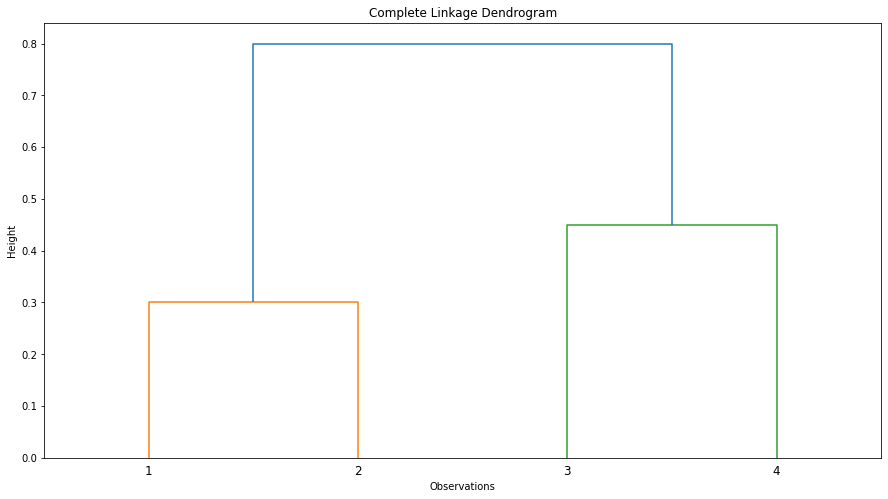

In [36]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Define the dissimilarity matrix
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])

# Convert the dissimilarity matrix to a condensed distance matrix
distance_vector = squareform(dissimilarity_matrix)

# Perform hierarchical clustering using the complete linkage method
linkage_matrix = linkage(distance_vector, method="complete")

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Complete Linkage Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Height")
plt.show()


(b) Repeat (a), this time using single linkage clustering.

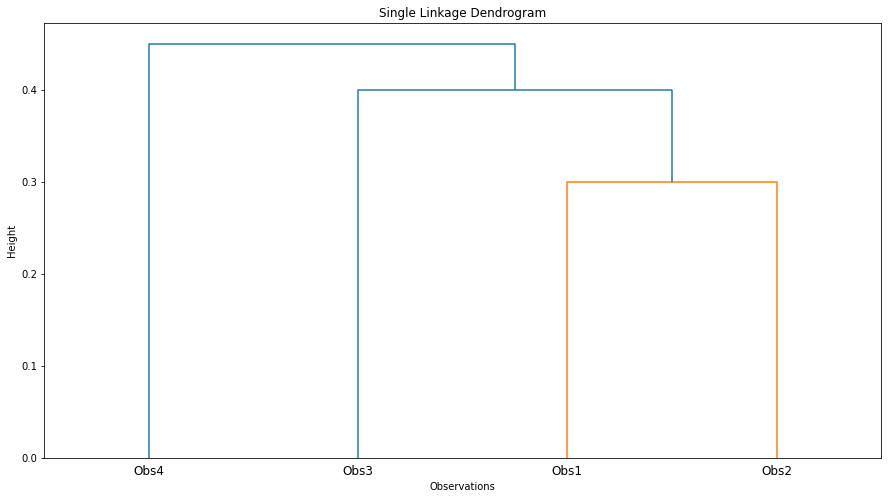

In [38]:
dists = squareform(dissimilarity_matrix)

# Perform hierarchical clustering using the single linkage method
linkage_matrix = linkage(dists, method="single")

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=["Obs1", "Obs2", "Obs3", "Obs4"])
plt.title("Single Linkage Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Height")
plt.show()

(c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

When cutting the complete linkage dendrogram to form two distinct clusters, the resulting groupings are:

Cluster 1: Observations 1 and 2
Cluster 2: Observations 3 and 4

(d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

When cutting the single linkage dendrogram to form two distinct clusters, the resulting groupings are:

Cluster 1: Observations 1, 2, and 3
Cluster 2: Observation 4 (alone)

(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

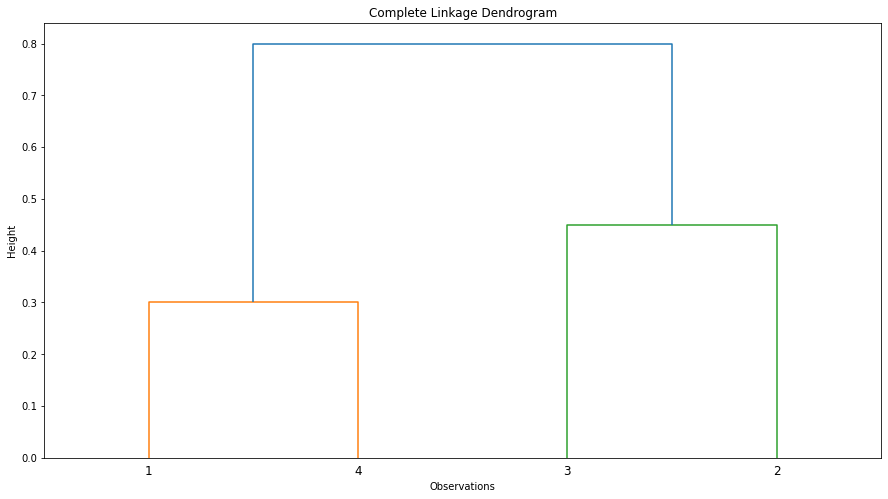

In [39]:
distance_vector = squareform(dissimilarity_matrix)

# Perform hierarchical clustering using the complete linkage method
linkage_matrix = linkage(distance_vector, method="complete")

# Create a dendrogram plot with reordered labels for observations
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=["1", "4", "3", "2"])
plt.title("Complete Linkage Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Height")
plt.show()